In [1]:
%matplotlib nbagg

In [2]:
import matplotlib.pyplot as plt

In [3]:
import requests

In [4]:
from ncempy.io import dm

In [5]:
from pacbedclient import query

In [6]:
pacbed = dm.dmReader("/cachedata/users/weber/PACBED-CNN-data.old/Measured_PACBED/PACBED_0.dm4")

<IPython.core.display.Javascript object>


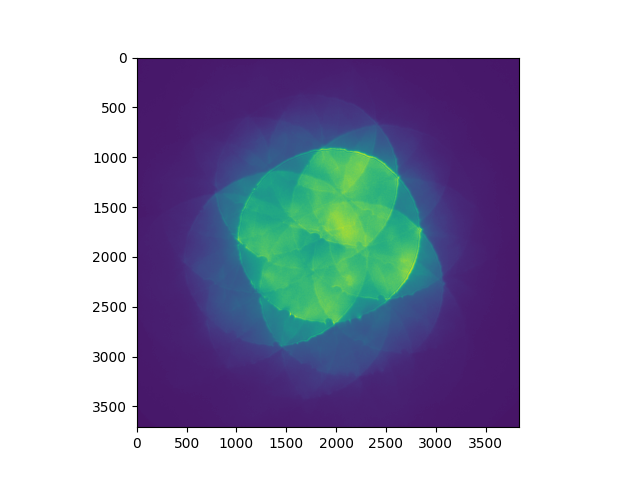

In [7]:
fig, ax = plt.subplots(1)
ax.imshow(pacbed['data'])

In [8]:
import json
import logging

In [9]:
if False:
    from http.client import HTTPConnection
    HTTPConnection.debuglevel = 1
    logging.basicConfig() # you need to initialize logging, otherwise you will not see anything from requests
    logging.getLogger().setLevel(logging.DEBUG)
    requests_log = logging.getLogger("urllib3")
    requests_log.setLevel(logging.DEBUG)
    requests_log.propagate = True

In [10]:
pacbed['data'].dtype

dtype('float32')

In [11]:
resp = requests.post("http://localhost:8912/inference/", files={
    "file": ("pacbed.raw", bytes(pacbed['data']), "application/octet-stream"),
    "parameters": (None, json.dumps({
        "dtype": str(pacbed['data'].dtype),
        "width": pacbed['data'].shape[1],
        "height": pacbed['data'].shape[0],
        "physical_params": {
            "acceleration_voltage": 80000,
            "zone_axis": {"u": 0, "v": 0, "w": 1},
            "crystal_structure": "Rutile",
            "convergence_angle": 20,
        }
    }), "application/json"), 
}, )

In [12]:
resp.json()

{'thickness': 70.0,
 'mistilt': 8.0,
 'scale': 1.0,
 'validation': 'iVBORw0KGgoAAAANSUhEUgAAAyAAAAPoCAYAAAAmy5qxAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90\nbGliIHZlcnNpb24zLjQuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/MnkTPAAAACXBIWXMAAA9h\nAAAPYQGoP6dpAAEAAElEQVR4nOy9ebwtR1ku/FRVr7WnM2YiIDEJIQHhQ/ED5AIyKsQrBC8hDOEy\nyWBwSH78UPmcUZnEAQQRFK/CvSSoNwwyY5BBlMHrgIgDc+CCDCHTyTlnn73X6q73+6PqrX6rVnWv\nXmuvvc8+5/Tz+52z9uqurq4eVlU99byDIiJCjx49evTo0aNHjx49euwA9PFuQI8ePXr06NGjR48e\nPU4d9ASkR48ePXr06NGjR48eO4aegPTo0aNHjx49evTo0WPH0BOQHj169OjRo0ePHj167Bh6AtKj\nR48ePXr06NGjR48dQ09AevTo0aNHjx49evTosWPoCUiPHj169OjRo0ePHj12DD0B6dGjR48ePXr0\n6NGjx46hJyA9evTo0aNHjx49evTYMfQEpEePXYCHPOQheMhDHnK8m9GjR48eM+G8887D05/+9ONy\n7l/91V+FUuq4nLsJX/7yl6GUwhve8Ibj3ZQePXY1egLSY+F4wxveAKUUlFL427/924n9RIRzzjkH\nSik86lGPOg4tPHFx3nnnhXurlMJZZ52FBz7wgXjb296WLf993/d9UErhta99bWu9H/7wh3HppZfi\n7LPPxnA4xFlnnYVLLrkEb33rW0MZHljlv3379uGe97wnXv3qV6OqqqjOhzzkIRPl+d9d73rXUE6+\nL0opLC8v4w53uAMuvvhivOpVr8Lhw4e3cMd69OgxDz796U/jsssuw7nnnovl5WV8x3d8Bx7+8I

In [13]:
result = query(pacbed['data'], 'Rutile', host='localhost', port='8912')

<IPython.core.display.Javascript object>


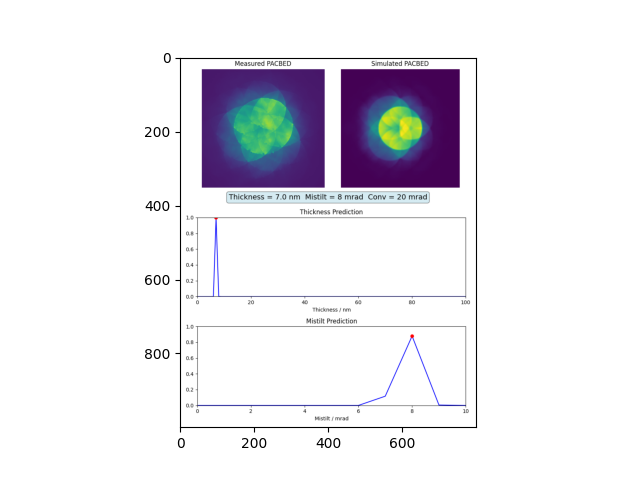

In [14]:
fig, axes = plt.subplots()
axes.imshow(result['validation'])

In [15]:
result = query(pacbed['data'], 'Strontium titanate', host='localhost', port='8912')

<IPython.core.display.Javascript object>


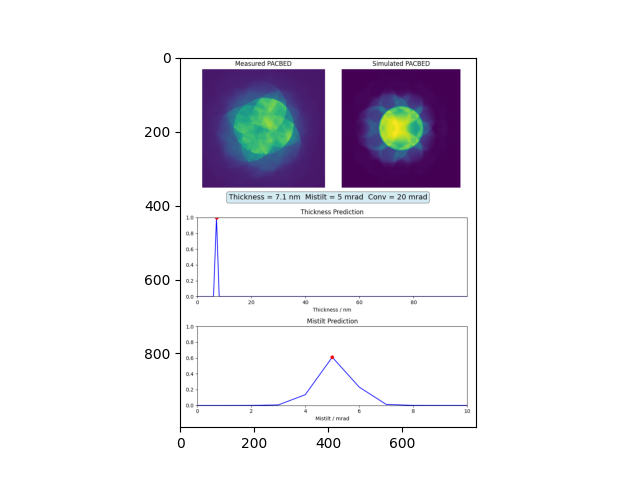

In [16]:
fig, axes = plt.subplots()
axes.imshow(result['validation'])